In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
DATA_PATH = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/weekly_agg.csv'
df = pd.read_csv(DATA_PATH)
df = df.drop(['Unnamed: 0', 'loc_id'], axis=1)

df = df.round(5) 
df

,latitude,longitude,0,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
0,3.0,33.0,3.17589,2.79655,2.40276,3.50478,4.58155,4.58058,4.74726,8.85822,...,24.92393,23.05205,21.07191,16.21844,9.50167,7.92381,7.16204,3.39404,3.80836,7.29013
1,3.0,33.5,2.91174,2.81994,2.83373,3.60306,4.89745,4.32246,4.68778,8.34240,...,19.29637,18.71141,16.43721,13.15010,8.26146,7.12578,7.14505,3.21821,4.37827,7.40894
2,3.0,34.0,2.83768,2.77351,3.30427,3.65917,4.99100,4.31104,4.55918,7.48935,...,16.08984,16.24519,14.30577,11.85728,7.91381,6.92578,7.66088,3.08912,4.66460,7.61283
3,3.0,34.5,2.76030,2.54977,3.60379,3.37612,4.62130,4.31634,3.84502,6.20721,...,15.51504,15.91630,14.29507,12.00292,8.22271,7.00946,8.11747,2.99146,4.19059,7.69414
4,3.0,35.0,2.40735,2.24277,3.47464,2.75864,3.95864,3.73948,2.74280,4.95868,...,12.36892,13.22978,11.84741,10.67019,7.52571,6.05527,7.21735,2.65190,3.66713,7.03480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,15.0,46.0,0.08230,0.22172,0.49749,0.79816,2.24871,1.86174,0.76865,1.40918,...,0.05495,0.37607,0.20590,0.16063,0.08738,0.07342,0.06422,0.15091,0.10422,0.93518
771,15.0,46.5,0.05882,0.15101,0.46882,0.52874,2.02889,1.18461,0.38523,0.92883,...,0.05089,0.51289,0.18280,0.09757,0.06941,0.06262,0.03602,0.11075,0.07148,0.54225
772,15.0,47.0,0.11328,0.26882,0.56652,0.76143,2.40445,1.17546,0.49498,1.04175,...,0.16650,1.12183,0.46301,0.16739,0.19106,0.17962,0.07523,0.25943,0.16366,0.40515
773,15.0,47.5,0.21206,0.48990,0.81689,1.08799,3.17098,1.57025,0.87147,1.39919,...,0.29409,1.64226,0.66674,0.24679,0.30902,0.34916,0.17187,0.40609,0.33624,0.76892


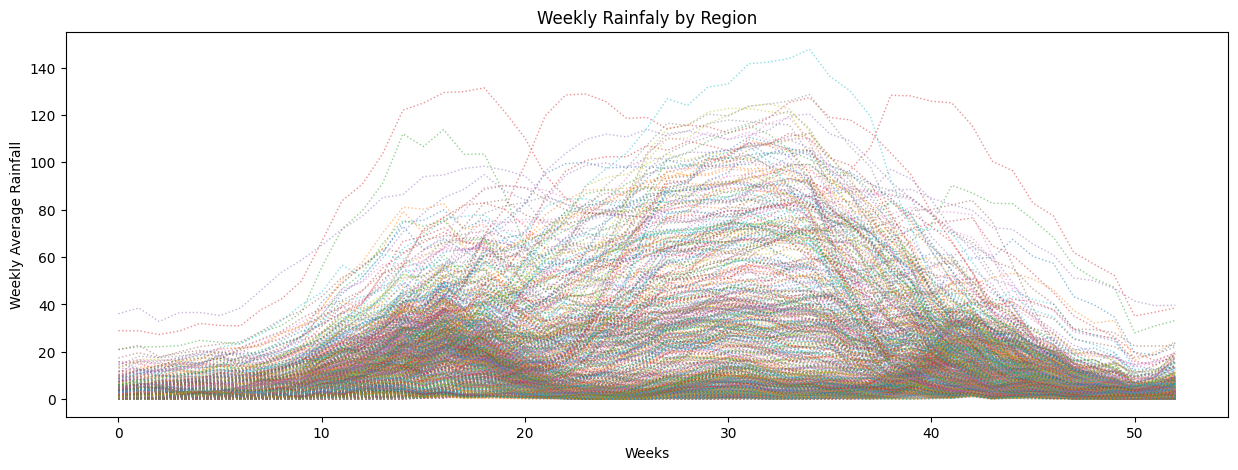

In [76]:

fig = plt.figure(figsize=(15, 5))

for i in range(df.shape[0]):
    ypoints =  df.iloc[i,2:].values.flatten().tolist()
    plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Weekly Rainfaly by Region')
plt.show()       
        

In [89]:
data = df.iloc[:,2:].values
data.shape

(775, 53)

In [90]:
def shifted(data):
    # subtract each feature vector from its mean
    shifted_data = data - np.mean(data,axis=0) 
    return shifted_data

In [91]:
def calculate_cov(data):
    num_samples = data.shape[1] 
    cov = (data @ data.T)/num_samples
    return cov

In [92]:
shifted_data = shifted(data).T
cov = calculate_cov(shifted_data)

In [93]:
cov

array([[ 9.88374756, 10.67819342, 10.09907715, ..., 10.13040815,
        10.94454173, 13.40077453],
       [10.67819342, 12.12618662, 11.63435148, ..., 10.6268807 ,
        11.76998792, 14.85761646],
       [10.09907715, 11.63435148, 11.89938974, ...,  9.98664098,
        11.45414706, 14.90388002],
       ...,
       [10.13040815, 10.6268807 ,  9.98664098, ..., 11.12164456,
        11.58549327, 13.87493604],
       [10.94454173, 11.76998792, 11.45414706, ..., 11.58549327,
        12.75102839, 15.49084959],
       [13.40077453, 14.85761646, 14.90388002, ..., 13.87493604,
        15.49084959, 21.77155822]])

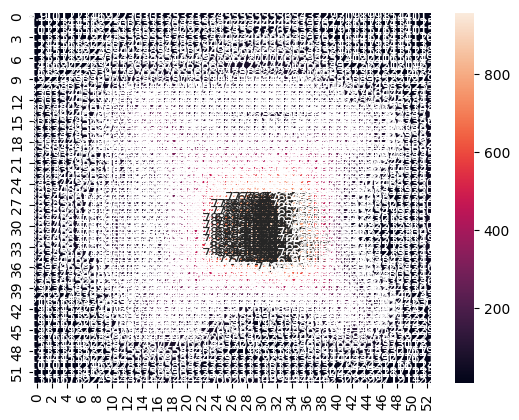

In [94]:
hm = sns.heatmap(data=cov, annot=True) 
plt.show()

In [95]:
def eigen(cov,features_names):
    eigen_values , eigen_vectors = np.linalg.eig(cov)
    # sort the eigenvectors and eigenvalues descending in terms of the eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_features = features_names[sorted_index]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    return sorted_eigenvalues,sorted_eigenvectors,sorted_features

In [96]:
features_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51',
       '52'])

In [97]:
eigenvalues, eigenvectors, sorted_features = eigen(cov,features_names)
print(f"Sorted Features: {sorted_features}")
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors:\n{eigenvectors}")

Sorted Features: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '45' '46' '47' '51' '52' '50'
 '49' '48' '44' '43' '42' '41' '40' '39' '38']
eigenvalues: [1.30420065e+04 2.50762454e+03 5.57764887e+02 1.96237658e+02
 1.54442611e+02 1.00664947e+02 4.86353481e+01 4.03295380e+01
 2.06015476e+01 1.49562726e+01 9.72515310e+00 6.50162788e+00
 3.65404099e+00 3.00461962e+00 2.60324839e+00 2.19951809e+00
 1.86817012e+00 1.48711782e+00 1.25007823e+00 1.15123615e+00
 9.79753498e-01 8.74281477e-01 7.33923489e-01 7.18803304e-01
 6.51619767e-01 5.89638042e-01 5.47953718e-01 5.19249875e-01
 4.22057346e-01 4.02993568e-01 3.73174131e-01 3.24756449e-01
 3.19726543e-01 2.70182203e-01 2.52679720e-01 2.25163843e-01
 2.14171839e-01 1.87864724e-01 1.57700378e-01 1.52738753e-01
 1.48789469e-01 1.19229304e-01 1.18820215e-01 1.11632197e-01
 1.01942709e-01 9.53071971e-02 7.565580

In [98]:
def pca(data,k,eigenvectors):
    top_eigenvectors = eigenvectors[:,:k]
    F = np.dot(top_eigenvectors.T,data)
    return F, top_eigenvectors

In [99]:
def calculate_error(F,top_eigenvectors,data):
    
    F_inverse = np.dot(top_eigenvectors,F) + np.mean(data,axis=0).reshape(-1,1)
    
    error = np.mean((data.T-F_inverse)**2)
    
    return error,F_inverse.T

In [100]:
for k in range(53,0,-1):
    data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
    error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
    print(f"{k} number of components Error: {error:0.2f}")

53 number of components Error: 0.00
52 number of components Error: 0.00
51 number of components Error: 0.00
50 number of components Error: 0.00
49 number of components Error: 0.00
48 number of components Error: 0.00
47 number of components Error: 0.01
46 number of components Error: 0.01
45 number of components Error: 0.01
44 number of components Error: 0.01
43 number of components Error: 0.01
42 number of components Error: 0.01
41 number of components Error: 0.02
40 number of components Error: 0.02
39 number of components Error: 0.02
38 number of components Error: 0.03
37 number of components Error: 0.03
36 number of components Error: 0.03
35 number of components Error: 0.04
34 number of components Error: 0.04
33 number of components Error: 0.05
32 number of components Error: 0.05
31 number of components Error: 0.06
30 number of components Error: 0.07
29 number of components Error: 0.07
28 number of components Error: 0.08
27 number of components Error: 0.09
26 number of components Erro

In [101]:
k = 12
data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
print(f"{k} number of components Error: {error:0.2f}")

12 number of components Error: 0.51


In [127]:
dataframe = pd.DataFrame.from_records(data_reduced.T)

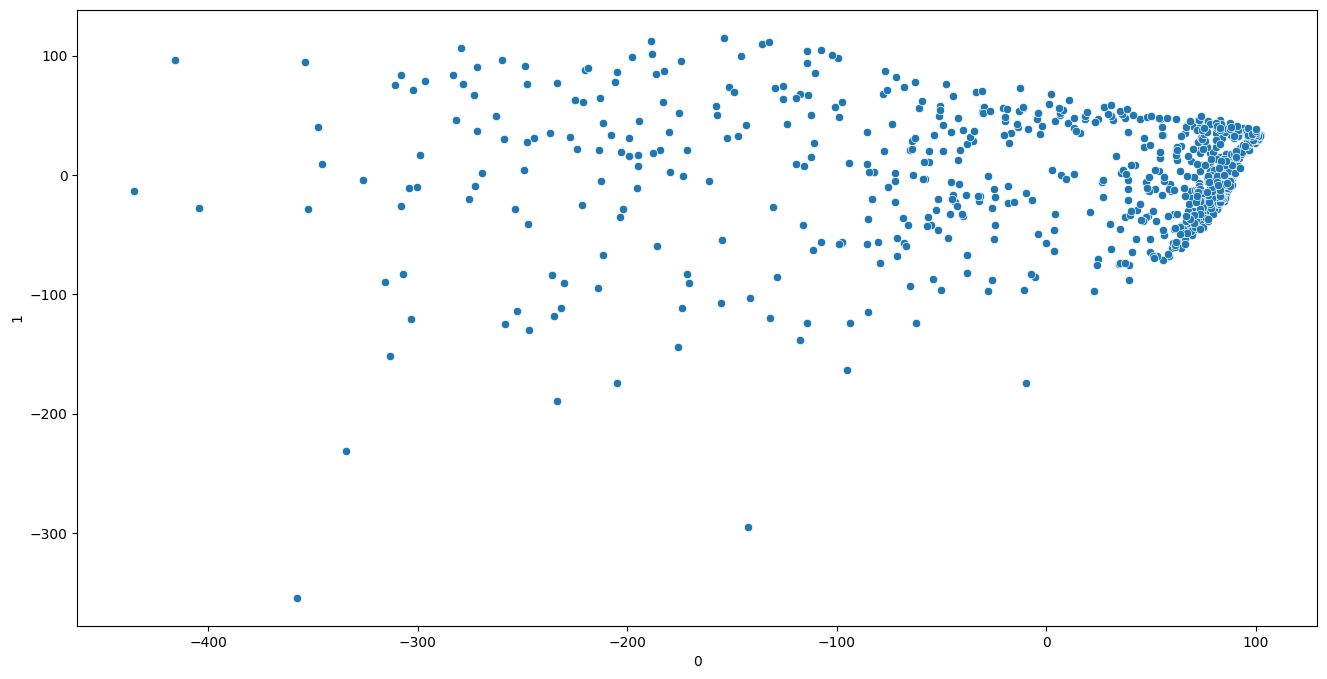

In [128]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], ax=ax)
plt.show()

In [129]:
def euclidean_distance(point1, point2):

    return np.sqrt(np.sum((point1 - point2) ** 2))

In [130]:
def range_query(data, point, epsilon):

    neighbors = []
    for i, data_point in enumerate(data):
        if euclidean_distance(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [131]:
def expand_cluster(data, labels, current_point, neighbors, cluster_id, epsilon, min_points):
    labels[current_point] = cluster_id
    queue = neighbors.copy()

    while queue:
        current_neighbor = queue.pop(0)

        if labels[current_neighbor] == -1:
            labels[current_neighbor] = cluster_id
            new_neighbors = range_query(data, data[current_neighbor], epsilon)
            if len(new_neighbors) >= min_points:
                queue.extend(new_neighbors)

        elif labels[current_neighbor] == 0:
            labels[current_neighbor] = cluster_id

In [132]:
def dbscan(data, epsilon, min_points):

    labels = np.full(len(data), -1, dtype=int)

    cluster_id = 0

    for i in range(len(data)):

        if labels[i] != -1:
            continue

        # Find neighbors of the current point
        neighbors = range_query(data, data[i], epsilon)

        # If the number of neighbors is less than min_points, mark the point as noise
        if len(neighbors) < min_points:
            labels[i] = -1  # Noise point
        else:
            # Expand the cluster starting from the current point
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_points)

    return labels

In [133]:
from sklearn.neighbors import NearestNeighbors

from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors = 12)
neighbors_fit = neighbors.fit(shifted_data.T)
distances, indices = neighbors_fit.kneighbors(shifted_data.T)

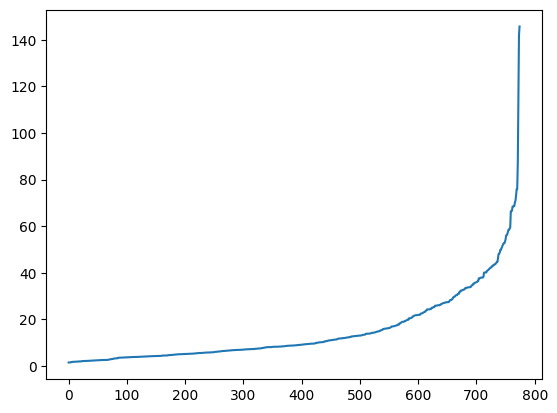

In [134]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [135]:
eps_values = np.arange(10,40, 5)
minPts_values = np.arange(4,8)
len(eps_values), len(minPts_values)

(6, 4)

In [136]:
from itertools import product
params = list(product(eps_values, minPts_values))

In [137]:
from sklearn.metrics import silhouette_score
sil_score = []
for p in params:
    cluster_labels = dbscan(shifted_data.T, p[0], p[1])
    if len(set(cluster_labels)) > 1:
        sil_score.append(silhouette_score(shifted_data.T, cluster_labels))
    else:
        sil_score.append(np.nan)

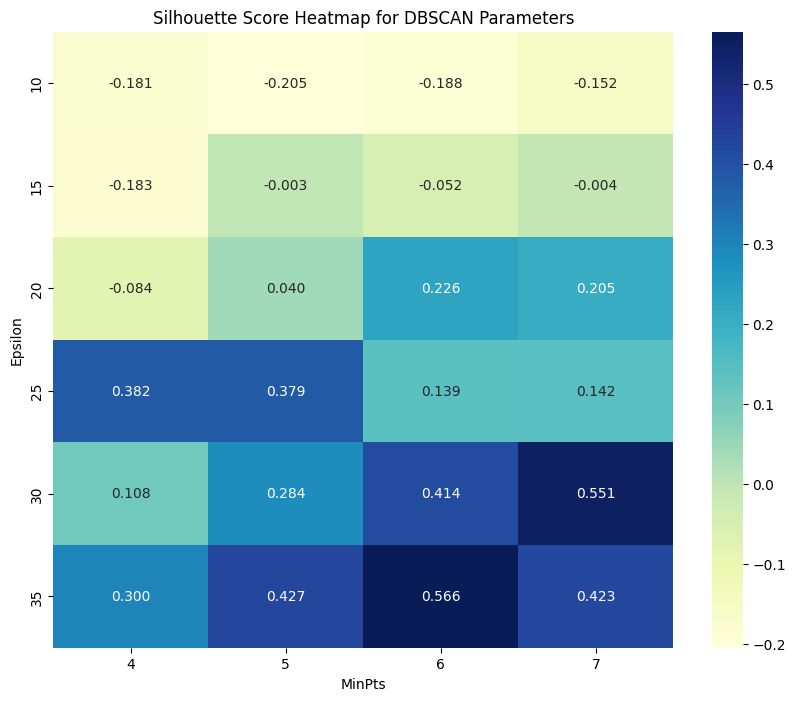

In [138]:
# Create a DataFrame to store the results
df = pd.DataFrame({'Epsilon': [p[0] for p in params],
                   'MinPts': [p[1] for p in params],
                   'Silhouette Score': sil_score})

# Create a pivot table for the heatmap
pivot_df = df.pivot(index='Epsilon', columns='MinPts', values='Silhouette Score')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Silhouette Score Heatmap for DBSCAN Parameters')
plt.show()

In [165]:
cluster_labels = dbscan(shifted_data.T, 30,4)
list(set(cluster_labels))

[1, 2, 3, 4, 5, 6, -1]

In [166]:
for num in np.unique(cluster_labels):
    print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster -1: 168
Cluster 1: 584
Cluster 2: 4
Cluster 3: 4
Cluster 4: 4
Cluster 5: 4
Cluster 6: 7


In [70]:
cluster_labels = dbscan(data_reduced.T, 30,8)

In [71]:
silhouette_score(data_reduced.T, cluster_labels)


0.5539714593684198

In [73]:
list(set(cluster_labels))

[1, -1]